In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('quora_duplicate_questions.csv')

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,False
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,False
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,False
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,False
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,False


In [5]:
df.shape

(404351, 6)

In [8]:
df['is_duplicate'] = df['is_duplicate'].map({True : 1, False : 0})
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [12]:
new_df = df.sample(30000)

In [13]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
392384,392384,766912,766913,Will UX writing be replaced by AI?,What do I need to know to write my own rudimen...,0
276940,276940,544507,544508,What are useful strength training + weight lif...,What kind of strength training exercises do F1...,0
240720,240720,474150,474151,When do you think Donald Trump will be assassi...,Do you think Donald Trump will be assassinated?,0
283747,283747,557701,557702,Is Mexico in danger of becoming a failed state...,Why is Mexico City dangerous?,0
129602,129602,256711,256712,Where can you learn ethical hacking?,How do I learn ethical hacking and what is pen...,1


In [22]:
new_df.shape

(30000, 6)

In [14]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [15]:
new_df.duplicated().sum()

0

In [21]:
# Distribution of duplicate and non-duplicate questions

new_df['is_duplicate'].value_counts(normalize = True)*100

0    63.336667
1    36.663333
Name: is_duplicate, dtype: float64

In [23]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts() > 1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 59832
Number of questions getting repeated 151


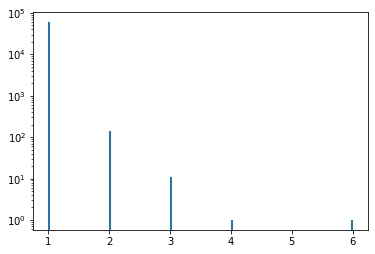

In [24]:
# Repeated questions histogram

plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

In [25]:
# Creating extra Features

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
392384,392384,766912,766913,Will UX writing be replaced by AI?,What do I need to know to write my own rudimen...,0,34,54
276940,276940,544507,544508,What are useful strength training + weight lif...,What kind of strength training exercises do F1...,0,118,58
240720,240720,474150,474151,When do you think Donald Trump will be assassi...,Do you think Donald Trump will be assassinated?,0,52,47
283747,283747,557701,557702,Is Mexico in danger of becoming a failed state...,Why is Mexico City dangerous?,0,83,29
129602,129602,256711,256712,Where can you learn ethical hacking?,How do I learn ethical hacking and what is pen...,1,36,54


In [26]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda x: len(x.split(' ')))
new_df['q2_num_words'] = new_df['question2'].apply(lambda x: len(x.split(' ')))

new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
392384,392384,766912,766913,Will UX writing be replaced by AI?,What do I need to know to write my own rudimen...,0,34,54,7,12
276940,276940,544507,544508,What are useful strength training + weight lif...,What kind of strength training exercises do F1...,0,118,58,18,10
240720,240720,474150,474151,When do you think Donald Trump will be assassi...,Do you think Donald Trump will be assassinated?,0,52,47,9,8
283747,283747,557701,557702,Is Mexico in danger of becoming a failed state...,Why is Mexico City dangerous?,0,83,29,17,5
129602,129602,256711,256712,Where can you learn ethical hacking?,How do I learn ethical hacking and what is pen...,1,36,54,6,10


In [27]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [28]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
392384,392384,766912,766913,Will UX writing be replaced by AI?,What do I need to know to write my own rudimen...,0,34,54,7,12,1
276940,276940,544507,544508,What are useful strength training + weight lif...,What kind of strength training exercises do F1...,0,118,58,18,10,4
240720,240720,474150,474151,When do you think Donald Trump will be assassi...,Do you think Donald Trump will be assassinated?,0,52,47,9,8,8
283747,283747,557701,557702,Is Mexico in danger of becoming a failed state...,Why is Mexico City dangerous?,0,83,29,17,5,2
129602,129602,256711,256712,Where can you learn ethical hacking?,How do I learn ethical hacking and what is pen...,1,36,54,6,10,2


In [29]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [30]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
392384,392384,766912,766913,Will UX writing be replaced by AI?,What do I need to know to write my own rudimen...,0,34,54,7,12,1,18
276940,276940,544507,544508,What are useful strength training + weight lif...,What kind of strength training exercises do F1...,0,118,58,18,10,4,27
240720,240720,474150,474151,When do you think Donald Trump will be assassi...,Do you think Donald Trump will be assassinated?,0,52,47,9,8,8,17
283747,283747,557701,557702,Is Mexico in danger of becoming a failed state...,Why is Mexico City dangerous?,0,83,29,17,5,2,21
129602,129602,256711,256712,Where can you learn ethical hacking?,How do I learn ethical hacking and what is pen...,1,36,54,6,10,2,16


In [31]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'], 2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
392384,392384,766912,766913,Will UX writing be replaced by AI?,What do I need to know to write my own rudimen...,0,34,54,7,12,1,18,0.06
276940,276940,544507,544508,What are useful strength training + weight lif...,What kind of strength training exercises do F1...,0,118,58,18,10,4,27,0.15
240720,240720,474150,474151,When do you think Donald Trump will be assassi...,Do you think Donald Trump will be assassinated?,0,52,47,9,8,8,17,0.47
283747,283747,557701,557702,Is Mexico in danger of becoming a failed state...,Why is Mexico City dangerous?,0,83,29,17,5,2,21,0.10
129602,129602,256711,256712,Where can you learn ethical hacking?,How do I learn ethical hacking and what is pen...,1,36,54,6,10,2,16,0.12


minimum characters 3
maximum characters 412
average num of characters 59


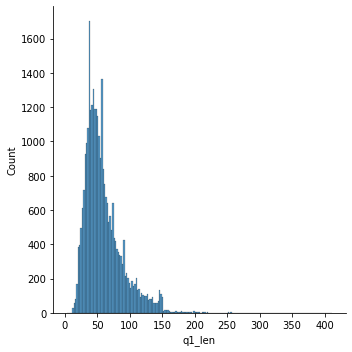

In [32]:
# Analysis of features

sns.displot(new_df['q1_len'])
print('minimum characters', new_df['q1_len'].min())
print('maximum characters', new_df['q1_len'].max())
print('average num of characters', int(new_df['q1_len'].mean()))

minimum characters 11
maximum characters 1169
average num of characters 60


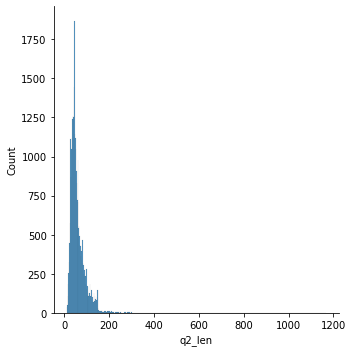

In [33]:
sns.displot(new_df['q2_len'])
print('minimum characters', new_df['q2_len'].min())
print('maximum characters', new_df['q2_len'].max())
print('average num of characters', int(new_df['q2_len'].mean()))

minimum words 1
maximum words 78
average num of words 10


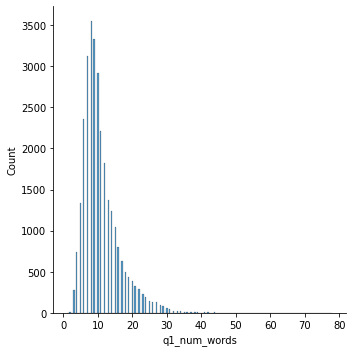

In [34]:
sns.displot(new_df['q1_num_words'])
print('minimum words', new_df['q1_num_words'].min())
print('maximum words', new_df['q1_num_words'].max())
print('average num of words', int(new_df['q1_num_words'].mean()))

minimum words 2
maximum words 237
average num of words 11


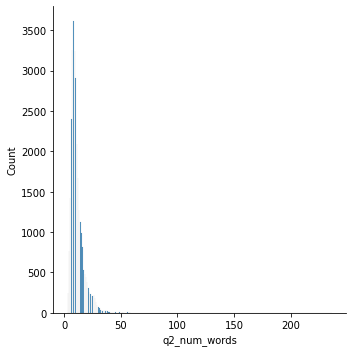

In [35]:
sns.displot(new_df['q2_num_words'])
print('minimum words', new_df['q2_num_words'].min())
print('maximum words', new_df['q2_num_words'].max())
print('average num of words', int(new_df['q2_num_words'].mean()))

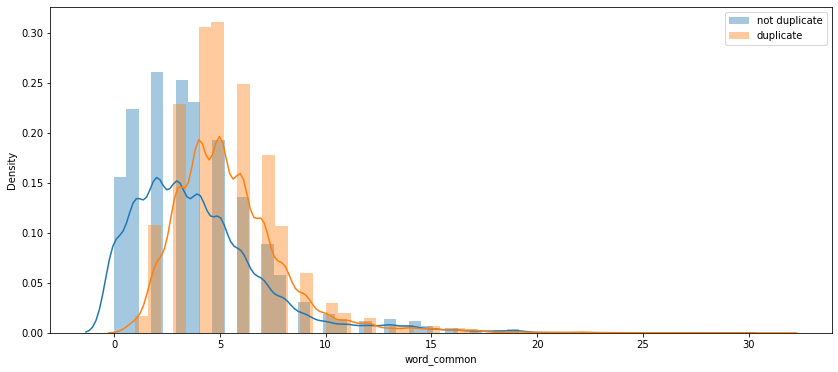

In [38]:
# common words

plt.figure(figsize = (14, 6))
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'], label = 'not duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'], label = 'duplicate')
plt.legend()
plt.show()

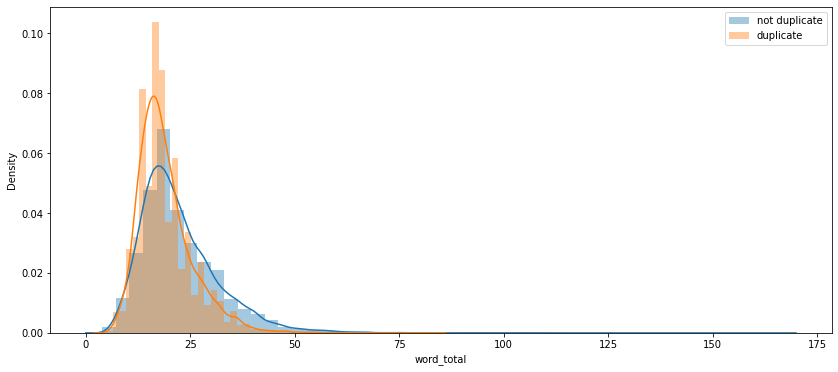

In [39]:
# total words

plt.figure(figsize = (14, 6))
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'], label = 'not duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'], label = 'duplicate')
plt.legend()
plt.show()

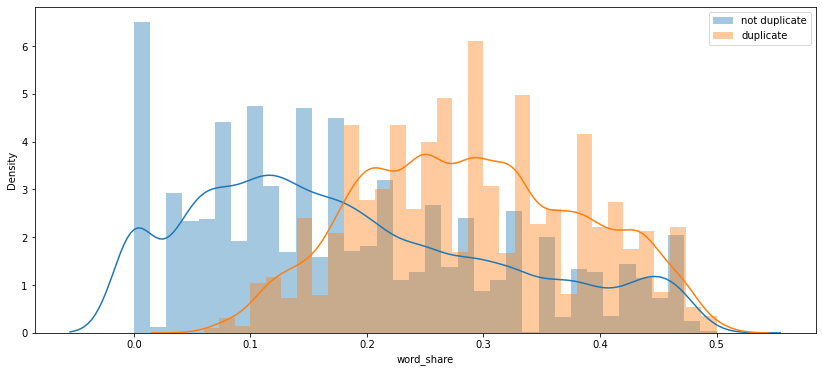

In [40]:
# word share

plt.figure(figsize = (14, 6))
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'], label = 'not duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'], label = 'duplicate')
plt.legend()
plt.show()

In [41]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
392384,Will UX writing be replaced by AI?,What do I need to know to write my own rudimen...
276940,What are useful strength training + weight lif...,What kind of strength training exercises do F1...
240720,When do you think Donald Trump will be assassi...,Do you think Donald Trump will be assassinated?
283747,Is Mexico in danger of becoming a failed state...,Why is Mexico City dangerous?
129602,Where can you learn ethical hacking?,How do I learn ethical hacking and what is pen...


In [42]:
final_df = new_df.drop(columns = ['id', 'qid1', 'qid2', 'question1', 'question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
392384,0,34,54,7,12,1,18,0.06
276940,0,118,58,18,10,4,27,0.15
240720,0,52,47,9,8,8,17,0.47
283747,0,83,29,17,5,2,21,0.10
129602,1,36,54,6,10,2,16,0.12


In [43]:
# merge texts

questions = list(ques_df['question1']) + list(ques_df['question2'])

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=3000)

In [45]:
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [46]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis = 1)
temp_df.shape

(30000, 6000)

In [47]:
final_df = pd.concat([final_df, temp_df], axis = 1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
392384,0,34,54,7,12,1,18,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
276940,0,118,58,18,10,4,27,0.15,0,0,...,0,0,0,0,0,0,0,0,0,0
240720,0,52,47,9,8,8,17,0.47,0,0,...,0,0,1,0,0,0,0,0,0,0
283747,0,83,29,17,5,2,21,0.10,0,0,...,0,0,0,0,0,0,0,0,0,0
129602,1,36,54,6,10,2,16,0.12,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X = final_df.iloc[:, 1:].values
Y = final_df.iloc[:, 0].values

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

accuracy_score(Y_test, Y_pred)

0.7696666666666667

In [51]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)

accuracy_score(Y_test, Y_pred)

0.7675